<a href="https://colab.research.google.com/github/Likitha38/python/blob/main/InternProject_Likitha_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import missingno as msno  # optional for missing value visualization


Preprocessing of the data

Exploring the data

In [2]:
df = pd.read_csv("OnlineRetail_Cleaned.csv",encoding='ISO-8859-1')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(514306, 8)

Dealing with the missing values.

In [5]:
df.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
514301,False,False,False,False,False,False,False,False
514302,False,False,False,False,False,False,False,False
514303,False,False,False,False,False,False,False,False
514304,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1437
Quantity,0
InvoiceDate,0
UnitPrice,1
CustomerID,126050
Country,1


In [7]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA', nan], dtype=object)

In [8]:
df.Country.nunique()

38

In [9]:
df[df['Country']=='United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
514283,579690,22358,KINGS CHOICE TEA CADDY,1,11/30/2011 14:03,2.95,15060.0,United Kingdom
514284,579690,22507,MEMO BOARD RETROSPOT DESIGN,1,11/30/2011 14:03,4.95,15060.0,United Kingdom
514285,579690,22278,OVERNIGHT BAG VINTAGE ROSE PAISLEY,3,11/30/2011 14:03,4.95,15060.0,United Kingdom
514286,579690,21034,REX CASH+CARRY JUMBO SHOPPER,2,11/30/2011 14:03,0.95,15060.0,United Kingdom


Here, we are dealing with the large amount of the data, so it is better to find out what is the count, null and type properties of the columns with the help of info()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514306 entries, 0 to 514305
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    514306 non-null  object 
 1   StockCode    514306 non-null  object 
 2   Description  512869 non-null  object 
 3   Quantity     514306 non-null  int64  
 4   InvoiceDate  514306 non-null  object 
 5   UnitPrice    514305 non-null  float64
 6   CustomerID   388256 non-null  float64
 7   Country      514305 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 31.4+ MB


In [11]:
##statistical analysis can be done with the help of describe()

df.describe()

,Quantity,UnitPrice,CustomerID
count,514306.000000,514305.000000,388256.000000
mean,9.602865,4.575585,15288.048360
std,156.634622,94.445971,1712.701267
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13954.750000
50%,3.000000,2.080000,15154.000000
75%,10.000000,4.130000,16790.000000
max,74215.000000,38970.000000,18287.000000


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(509322, 8)

In [14]:
df.InvoiceNo.unique()

array(['536365', '536366', '536367', ..., '579690', '579691', '579692'],
      dtype=object)

In [15]:
df.InvoiceNo.nunique()

24799

In [16]:
df['CustomerID']

,CustomerID
0,17850.0
1,17850.0
2,17850.0
3,17850.0
4,17850.0
...,...
514301,12433.0
514302,12433.0
514303,12433.0
514304,12433.0


In [17]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 12953., 12966., 15060.])

In [18]:
df['CustomerID'].nunique()

4330

In [19]:
df.shape

(509322, 8)

In [20]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [21]:
df['Quantity'].nunique()

702

In [22]:
df.Country.unique()[0]

'United Kingdom'

In [23]:
df.Country.unique()[2]

'Australia'

In [24]:
type(df.Country.unique()[0])

str

In [25]:
df['Country'] = df['Country'].apply(lambda x: np.where(x == "","NA",x))
print(df['Country'].unique())

DTypePromotionError: The DType <class 'numpy.dtypes.StrDType'> could not be promoted by <class 'numpy.dtypes._PyFloatDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

In [26]:
df.Country.nunique()

38

In [27]:
df.StockCode.unique()

array(['85123A', '71053', '84406B', ..., '23609', '85179a', '23617'],
      dtype=object)

In [28]:
df.StockCode.nunique()

4067

In [29]:
ti=[ ]
df['InvoiceNo'].apply(lambda x:ti.extend(x.split(",")))
ti=pd.Series(ti)
n=ti.nunique()
print("Total unique invoice no =  ", n)

Total unique invoice no =   24799


In [30]:
df[['InvoiceNo','StockCode','CustomerID']].describe()

,CustomerID
count,383314.000000
mean,15281.401478
std,1713.123186
min,12346.000000
25%,13937.000000
50%,15150.000000
75%,16780.000000
max,18287.000000


In [31]:
df[['InvoiceNo','StockCode','CustomerID']].head()

,InvoiceNo,StockCode,CustomerID
0,536365,85123A,17850.0
1,536365,71053,17850.0
2,536365,84406B,17850.0
3,536365,84029G,17850.0
4,536365,84029E,17850.0


In [32]:
df[['InvoiceNo','StockCode','CustomerID']].describe().loc[['count','mean','max']]

,CustomerID
count,383314.000000
mean,15281.401478
max,18287.000000


In [33]:
df['Description']

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
514301,TRAVEL CARD WALLET PANTRY
514302,SET OF 12 FAIRY CAKE BAKING CASES
514303,SET OF 4 KNICK KNACK TINS DOILY
514304,CLASSIC CAFE SUGAR DISPENSER


In [34]:
df['Description'].nunique()

4212

In [35]:
df['Description'].shape

(509322,)

In [36]:
vcount = df['Country'].value_counts()
vcount

,count
Country,
United Kingdom,464792
Germany,9124
France,8101
EIRE,7840
Spain,2457
Netherlands,2285
Switzerland,1994
Belgium,1971
Portugal,1407


In [37]:
df.Quantity

,Quantity
0,6
1,6
2,8
3,6
4,6
...,...
514301,48
514302,32
514303,6
514304,12


## Exploratory Data Analysis

Here we are plotting quantity range from 0 to 30

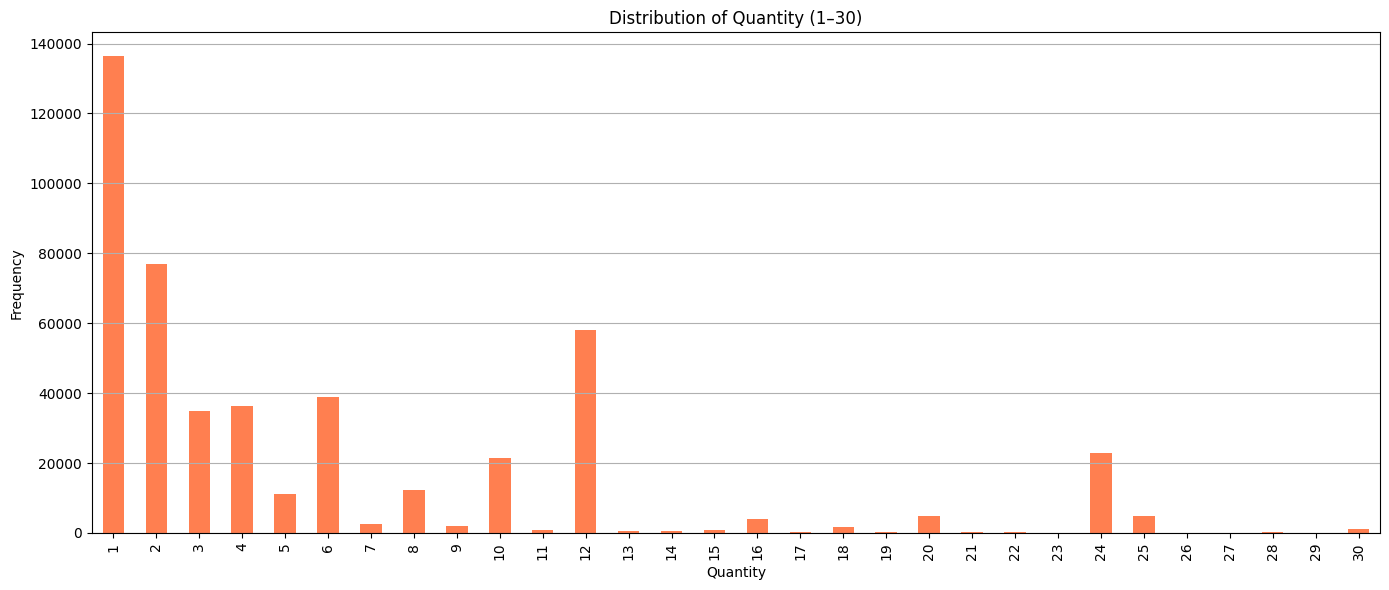

In [38]:
# Filter for quantities within a reasonable range for visibility (e.g. 0–100)
filtered_df = df[(df['Quantity'] > 0) & (df['Quantity'] <= 30)]

# Count occurrences of each quantity value
quantity_counts = filtered_df['Quantity'].value_counts().sort_index()

# Plot the barplot
plt.figure(figsize=(14, 6))
quantity_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Quantity (1–30)')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Identifying outliers in Unit Price

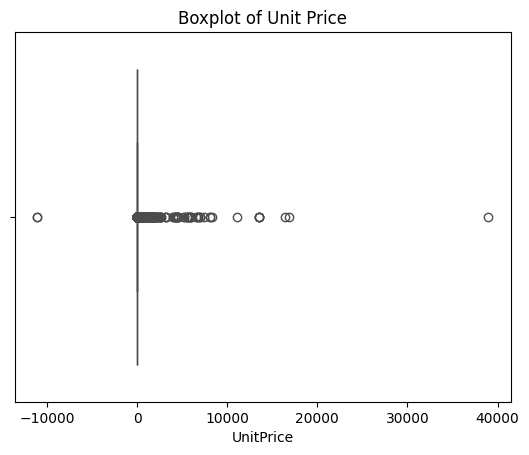

In [39]:
#Identifying outliers in unitprice
sns.boxplot(x=df['UnitPrice'], color='orange')
plt.title('Boxplot of Unit Price')
plt.show()


To compare frequencies of categorical values like Country

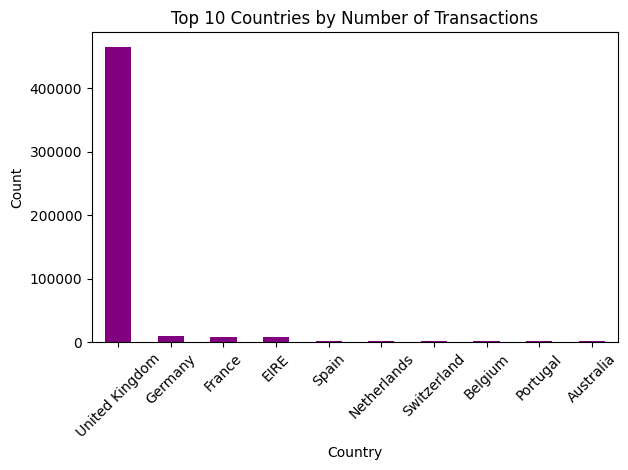

In [40]:
df['Country'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Countries by Number of Transactions')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Analyzing trends over time (e.g. number of orders per day)

In [42]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date
orders_per_day = df.groupby('InvoiceDay').size()

orders_per_day.plot(figsize=(14, 6), color='green')
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()


ValueError: time data "11/30" doesn't match format "%m/%d/%Y %H:%M", at position 22289. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<ipython-input-43-d022f426744c>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=filtered_df, x='UnitPrice', shade=True, color='blue')


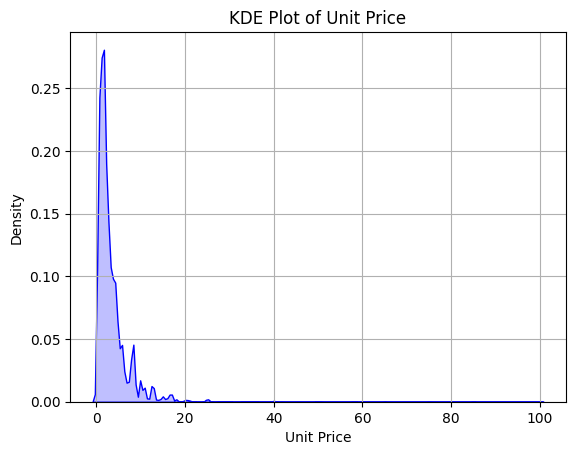

In [43]:
# Optional: Filter out extreme values for better visualization
filtered_df = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 100)]

# KDE plot
sns.kdeplot(data=filtered_df, x='UnitPrice', shade=True, color='blue')
plt.title('KDE Plot of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.grid(True)
plt.show()


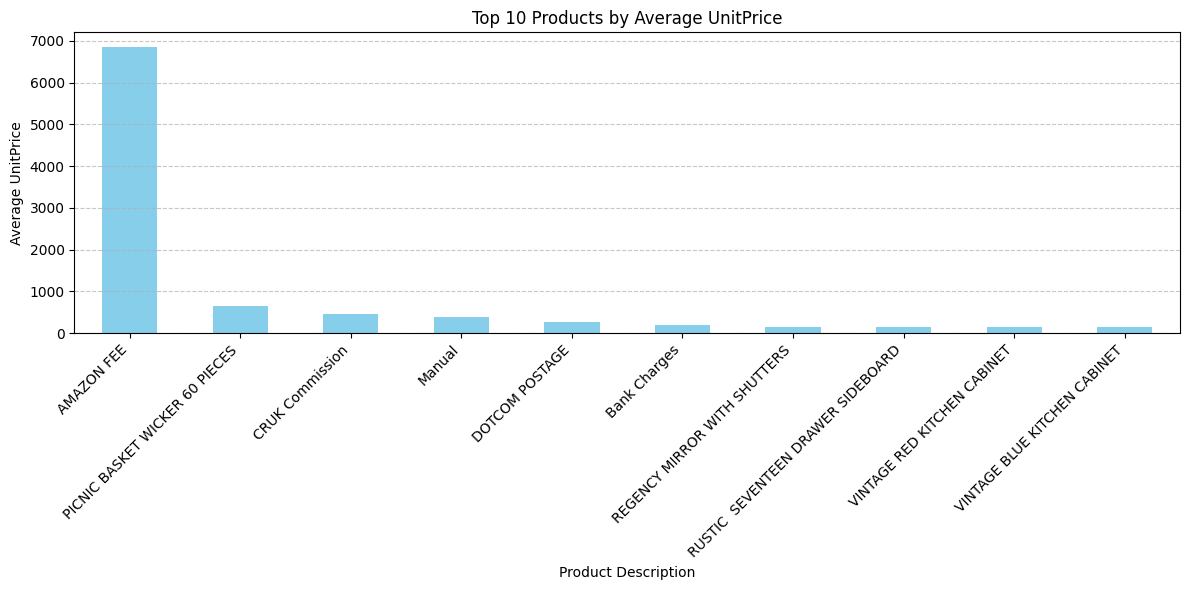

In [44]:
# Group by Description and calculate average UnitPrice
avg_price_by_product = df.groupby("Description")["UnitPrice"].mean().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
avg_price_by_product.plot(kind='bar', color='skyblue')
plt.title('Top 10 Products by Average UnitPrice')
plt.ylabel('Average UnitPrice')
plt.xlabel('Product Description')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Comparing price distribution across countries

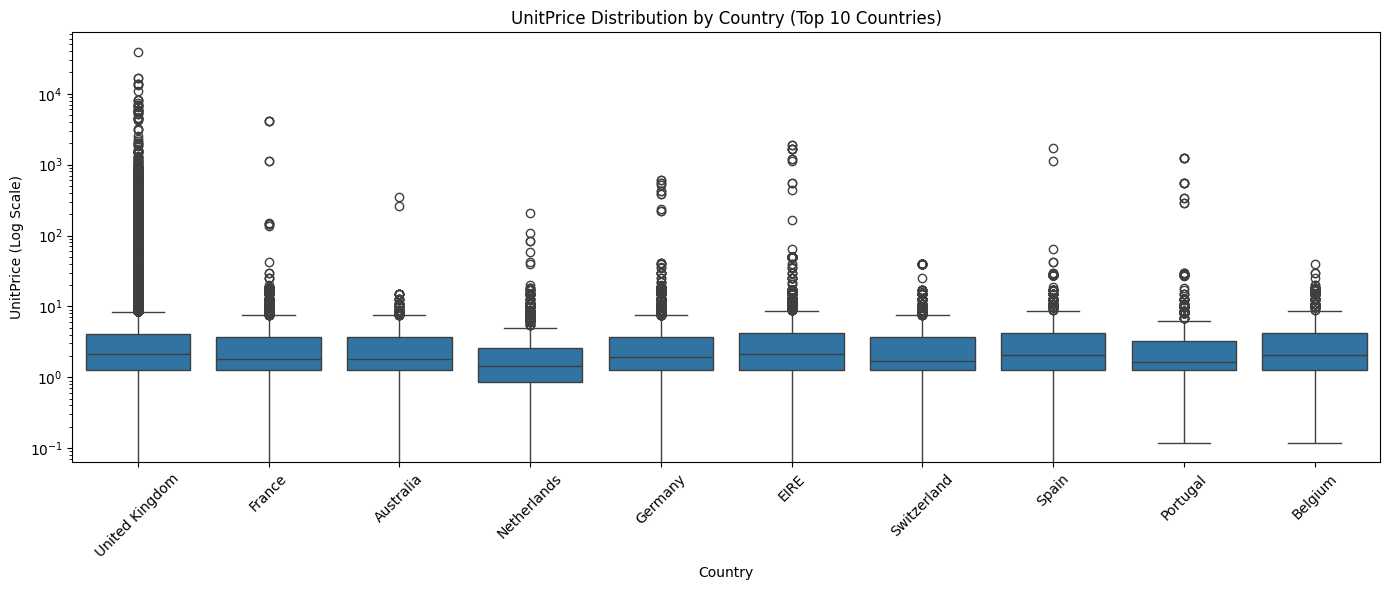

In [45]:
# Select top 10 countries by number of transactions for clearer plot
top_countries = df['Country'].value_counts().head(10).index
filtered_df = df[df['Country'].isin(top_countries)]

# Plotting
plt.figure(figsize=(14, 6))
sns.boxplot(x='Country', y='UnitPrice', data=filtered_df)
plt.yscale('log')  # Log scale to handle extreme outliers better
plt.title('UnitPrice Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('UnitPrice (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-46-bc950a381ee9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='bright')


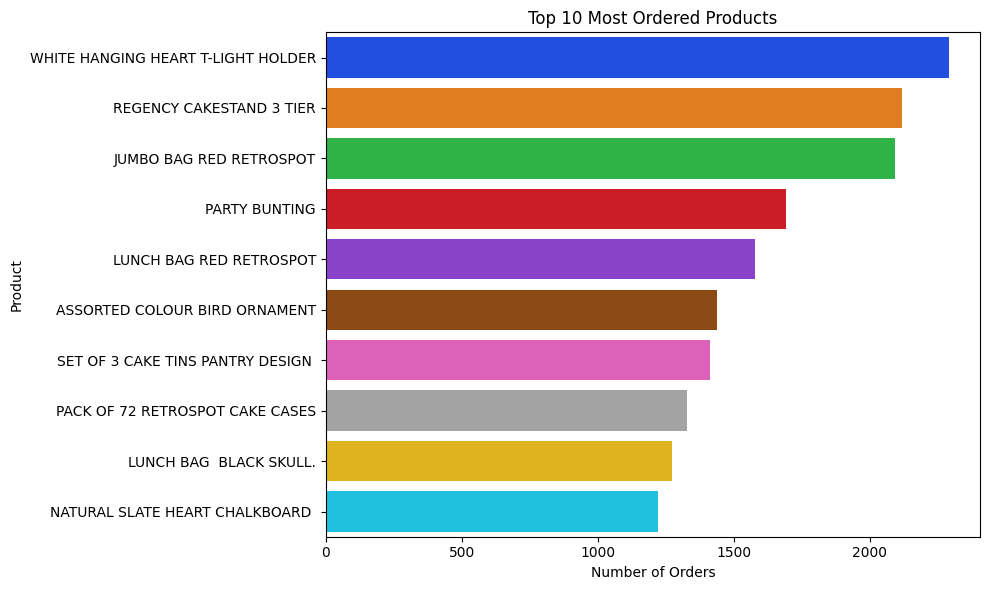

In [46]:
# Top 10 most ordered items
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='bright')
plt.title('Top 10 Most Ordered Products')
plt.xlabel('Number of Orders')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


## Conclusions from the dataset:

After working on this data, we can conclude the following things:-

1.Distribution of the quantity.

2.Finding outliers in unit price.

3.Orders per day.

4.Amazon fee is the top product by average UnitPrice.

5.UnitPrice Distribution by Country.

6.White hanging heart t-light holder is the ordered item.

# Sales Prediction


In [47]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

ValueError: time data "11/30" doesn't match format "%m/%d/%Y %H:%M", at position 22289. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = df.dropna(subset=['CustomerID'])

# Create a new 'TotalPrice' column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-48-da0b7549ff2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [49]:
# Group by customer
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice',
    'InvoiceNo': 'NumOrders',
    'TotalPrice': 'Monetary'  # This is the target variable
})

customer_df = customer_df[customer_df['Monetary'] > 0]


In [50]:
# Features: TotalQuantity, AvgUnitPrice, NumOrders
X = customer_df[['TotalQuantity', 'AvgUnitPrice', 'NumOrders']]

# Target: Monetary (Sales)
y = customer_df['Monetary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [51]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 8765571.98
R^2 Score: 0.90


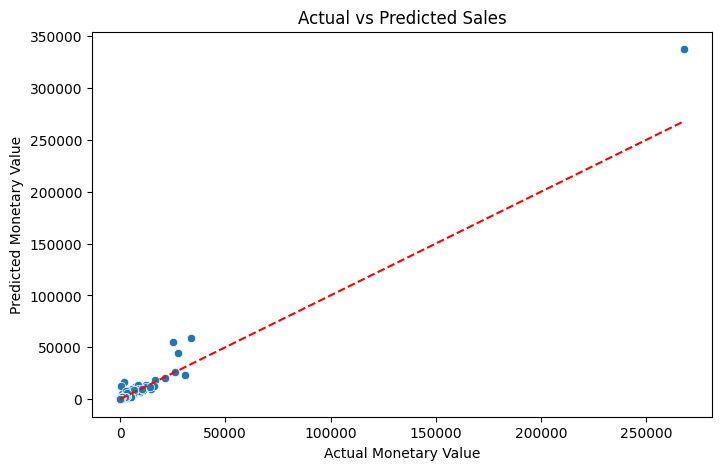

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Monetary Value')
plt.ylabel('Predicted Monetary Value')
plt.title('Actual vs Predicted Sales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.show()


In [53]:
# Take inputs
total_quantity = float(input("Enter Total Quantity purchased: "))
avg_unit_price = float(input("Enter Average Unit Price: "))
num_orders = int(input("Enter Number of Orders: "))

# Create input DataFrame
input_data = pd.DataFrame([[total_quantity, avg_unit_price, num_orders]],
                          columns=['TotalQuantity', 'AvgUnitPrice', 'NumOrders'])

# Predict
predicted_spending = model.predict(input_data)

print(f"Predicted Customer Spending: ₹{predicted_spending[0]:.2f}")


Enter Total Quantity purchased: 20
Enter Average Unit Price: 20
Enter Number of Orders: 20
Predicted Customer Spending: ₹212.47


In [54]:
print("Intercept (b):", model.intercept_)
print("Coefficients (w1, w2, w3):", model.coef_)

#calculation of customer spending is done by using formula (w1*totalquantity)+(w2*avg_unit_price)+(w3*num_orders)+b

Intercept (b): -130.78313581733164
Coefficients (w1, w2, w3): [ 1.78202868  0.17648022 15.20398193]
